In [27]:
!wget -O kalman_filter.py https://raw.githubusercontent.com/HiEST/bojos/master/kalman/kalman_filter.py
!wget -O tracelib.py https://raw.githubusercontent.com/HiEST/bojos/master/traces/tracelib.py
!wget -O simulated.csv https://raw.githubusercontent.com/HiEST/bojos/master/data/simulated.csv
!wget -O AbelMatutes_2016-01.csv https://raw.githubusercontent.com/HiEST/bojos/master/data/AbelMatutes_2016-01.csv
!pip install plotly_express

--2020-11-06 13:10:51--  https://raw.githubusercontent.com/HiEST/bojos/master/kalman/kalman_filter.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1167 (1.1K) [text/plain]
Saving to: ‘kalman_filter.py’

kalman_filter.py    100%[===================>]   1.14K  --.-KB/s    in 0s      

2020-11-06 13:10:51 (67.6 MB/s) - ‘kalman_filter.py’ saved [1167/1167]

--2020-11-06 13:10:51--  https://raw.githubusercontent.com/HiEST/bojos/master/traces/tracelib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2536 (2.5K) [text/plain]
Saving to: ‘trace

In [13]:
import numpy as np
import pandas as pd
from statistics import stdev
from kalman_filter import *
from tracelib import *

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

In [15]:
def plot_kalman(measurements, predictions, truth=None):
    plt.plot(range(len(measurements)), measurements, label = 'Measurements')
    plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
    if truth is not None:
        plt.plot(range(len(truth)), truth, label = 'Truth')
    plt.legend()
    plt.show()

In [16]:
def predict_kalman(kf, measurements): 
    predictions = []
    for z in measurements:
        predictions.append(np.dot(H,  kf.predict())[0][0])
        kf.update(z)
    return(predictions)

# Examples

## Example 1

In [17]:
n_samples=1000
noise_sd = 5

Matrix setup

In [18]:
dt = 1.0/60
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)

Data initialization

In [19]:
x = np.linspace(-10, 10, n_samples)
truth = - (x**2 + 2*x - 2)  
measurements = truth + np.random.normal(0, noise_sd, n_samples)

Init Kalman filter

In [20]:
kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
predictions = []

Predict and update filter

In [21]:
predictions = predict_kalman(kf, measurements)

Plot!

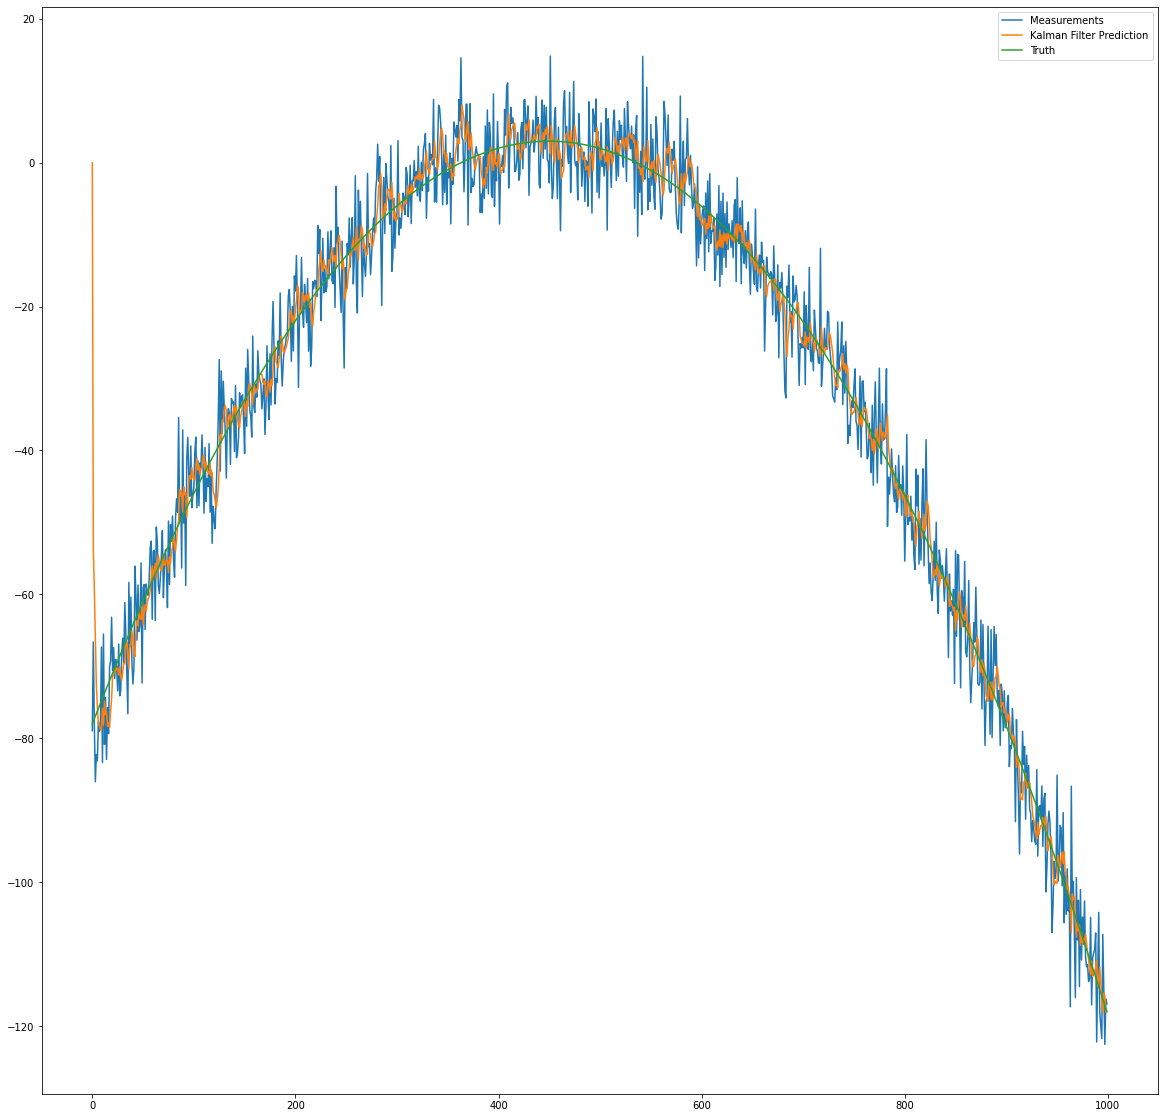

In [22]:
plot_kalman(measurements, predictions, truth)


## Example 2

In [23]:
base = np.concatenate([np.repeat(1,9), np.array([2])])
x_error = np.tile(base, 100)

In [24]:
measurements = truth * x_error

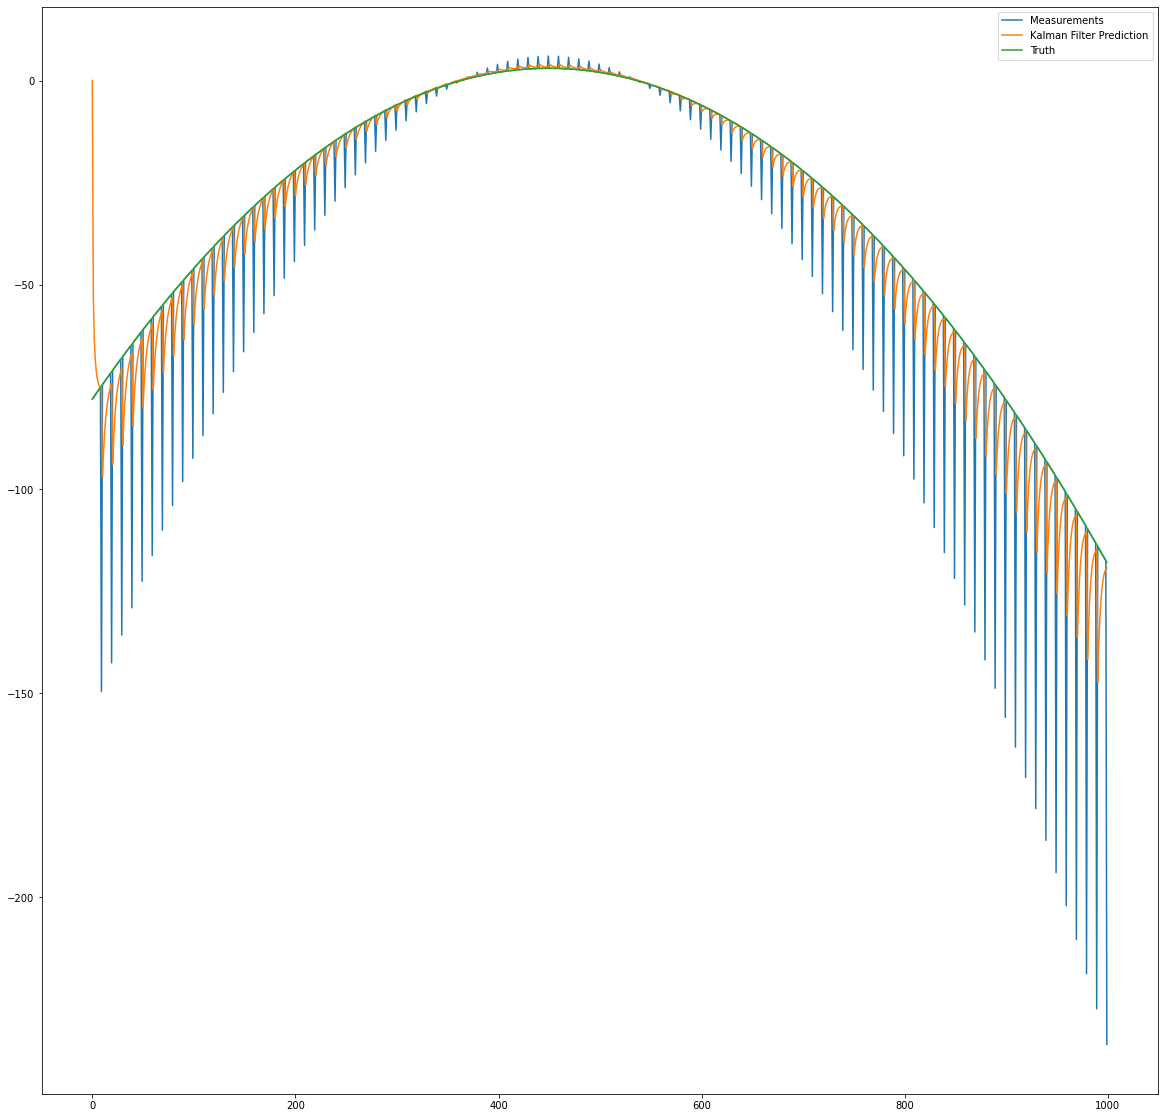

In [25]:
kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
predictions = []

predictions = predict_kalman(kf, measurements)
plot_kalman(measurements, predictions, truth)

## Example 3

In [28]:
df = pd.read_csv("simulated.csv")

In [29]:
df

,ts,lon,lat,noxme,noxae,soxme,soxae,co2me,co2ae,come,coae,speed,pme,pae
0,2019-11-14 13:41:26.468,2.110008,41.390541,2.132631,2.996036,0.059256,0.083247,92.379033,129.779111,58.079567,0.0,5.765364,533.863071,750.0
1,2019-11-14 13:41:27.905,2.110062,41.390566,31.427895,2.996036,0.873244,0.083247,1361.360251,129.779111,3048.766225,0.0,14.134918,7867.369251,750.0
2,2019-11-14 13:41:29.677,2.110115,41.390590,16.760788,2.996036,0.465709,0.083247,726.026037,129.779111,420.986727,0.0,11.462684,4195.740925,750.0
3,2019-11-14 13:41:31.538,2.110169,41.390614,14.469265,2.996036,0.402038,0.083247,626.764285,129.779111,70.989362,0.0,10.914496,3622.102276,750.0
4,2019-11-14 13:41:34.297,2.110223,41.390638,4.444896,2.996036,0.123504,0.083247,192.539294,129.779111,95.258467,0.0,7.364480,1112.694248,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-11-14 13:45:28.071,2.113833,41.395620,0.193420,4.993393,0.005374,0.138745,8.378364,216.298519,0.049479,0.0,2.590332,48.418988,1250.0
68,2019-11-14 13:45:33.789,2.113860,41.395652,0.263950,4.993393,0.007334,0.138745,11.433502,216.298519,0.217463,0.0,2.873175,66.074783,1250.0
69,2019-11-14 13:45:39.159,2.113881,41.395680,0.198917,4.993393,0.005527,0.138745,8.616476,216.298519,0.159506,0.0,2.614642,49.795046,1250.0
70,2019-11-14 13:45:45.909,2.113903,41.395709,0.100053,4.993393,0.002780,0.138745,4.334010,216.298519,0.132149,0.0,2.079372,25.046460,1250.0


In [30]:
# Reducing the outlier a bit
df.loc[df.speed > 35, 'speed'] = 35

In [31]:
dt = 1
F = np.array([[0.0005, dt, 0], [0, .0905, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)

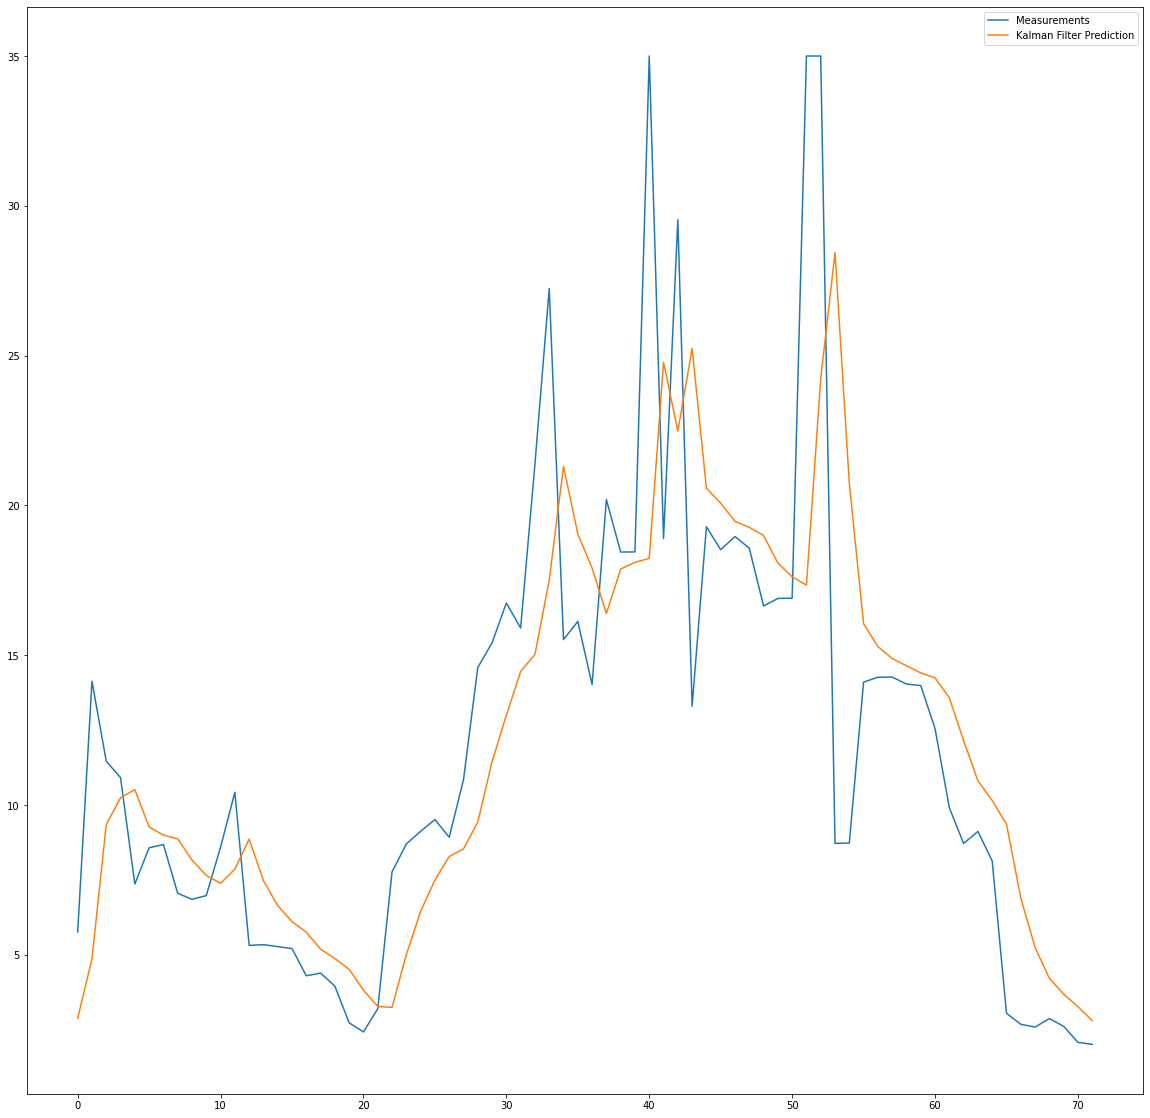

In [32]:
sd = stdev(df.speed)
# State-transition model
F = np.array([[1]])               
# Observational model - Influences on Kalman Gain
H = np.array([[0.5]])               
# Covariance of the process noise
Q = np.array([[1]])              
# Covariance of the observation noise
R = np.array([[1]])              
# Initial value and covariance
x0 = df.speed.iloc[0]             
P = stdev(df.speed)               # Initial covariance

# F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None
#kf_speed = KalmanFilter(F = F, H = H, Q = Q, R = R, P = P, x0 = x0)
kf_speed = KalmanFilter(H = H, R = R, F = F, P = P, x0 = x0)
predictions_speed = predict_kalman(kf_speed, df.speed)
plot_kalman(df.speed, predictions_speed)

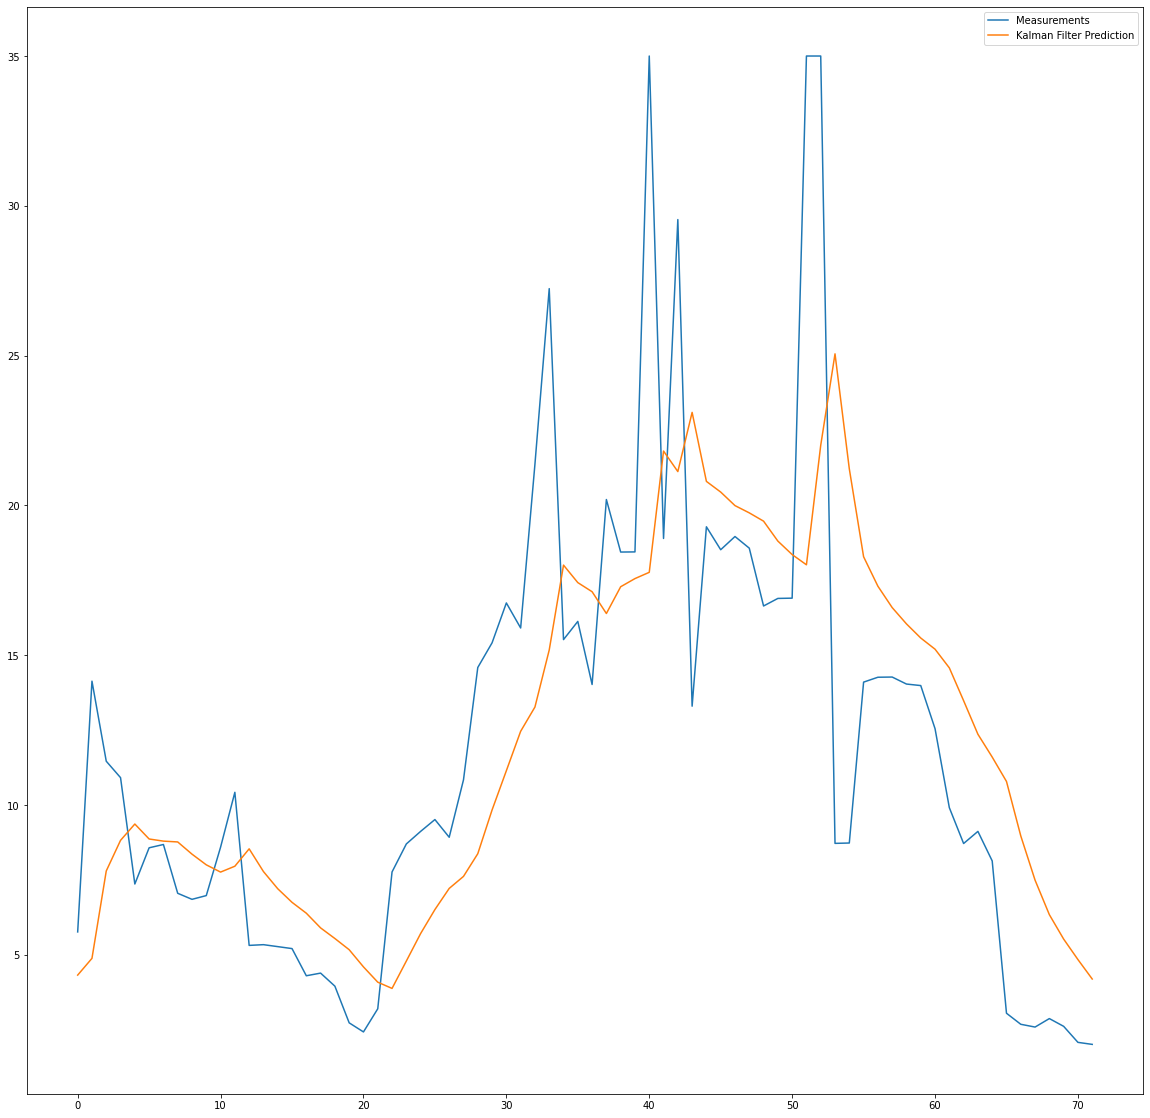

In [33]:
# NOW Q AND R are adjusted to standard dev!

sd = stdev(df.speed)
# State-transition model
F = np.array([[1]])               
# Observational model - Influences on Kalman Gain
H = np.array([[0.75]])               
# Covariance of the process noise
Q = np.array([[sd]])              
# Covariance of the observation noise
R = np.array([[sd]])              
# Initial value and covariance
x0 = df.speed.iloc[0]             
P = stdev(df.speed)               # Initial covariance

# F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None
#kf_speed = KalmanFilter(F = F, H = H, Q = Q, R = R, P = P, x0 = x0)
kf_speed = KalmanFilter(H = H, R = R, F = F, P = P, x0 = x0)
predictions_speed = predict_kalman(kf_speed, df.speed)
plot_kalman(df.speed, predictions_speed)

# Real Example

In [35]:
abel = pd.read_csv("AbelMatutes_2016-01.csv", sep=";")

In [36]:
abel

,nombre,imo,mmsi,size_a,size_b,size_c,size_d,eslora,manga,draught,sog,cog,rot,heading,navstatus,typeofshipandcargo,latitude,longitude,fechahora
0,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,19.8,358,0,356,0,60,40.760662,2.219040,2016-01-16 16:37:11
1,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,19.7,358,0,355,0,60,40.761203,2.219010,2016-01-16 16:37:17
2,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,19.8,358,0,355,0,60,40.761843,2.218985,2016-01-16 16:37:24
3,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,19.8,358,0,355,0,60,40.762305,2.218968,2016-01-16 16:37:29
4,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,19.7,357,0,355,0,60,40.762943,2.218927,2016-01-16 16:37:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,20.3,176,0,173,0,60,40.764937,2.210982,2016-01-31 23:56:13
8433,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,20.3,176,0,173,0,60,40.764370,2.211022,2016-01-31 23:56:19
8434,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,20.3,176,0,173,0,60,40.762115,2.211222,2016-01-31 23:56:43
8435,ABEL MATUTES,9441130,224402000,20,170,5,20,190,25,5.5,20.3,176,0,173,0,60,40.761552,2.211278,2016-01-31 23:56:49


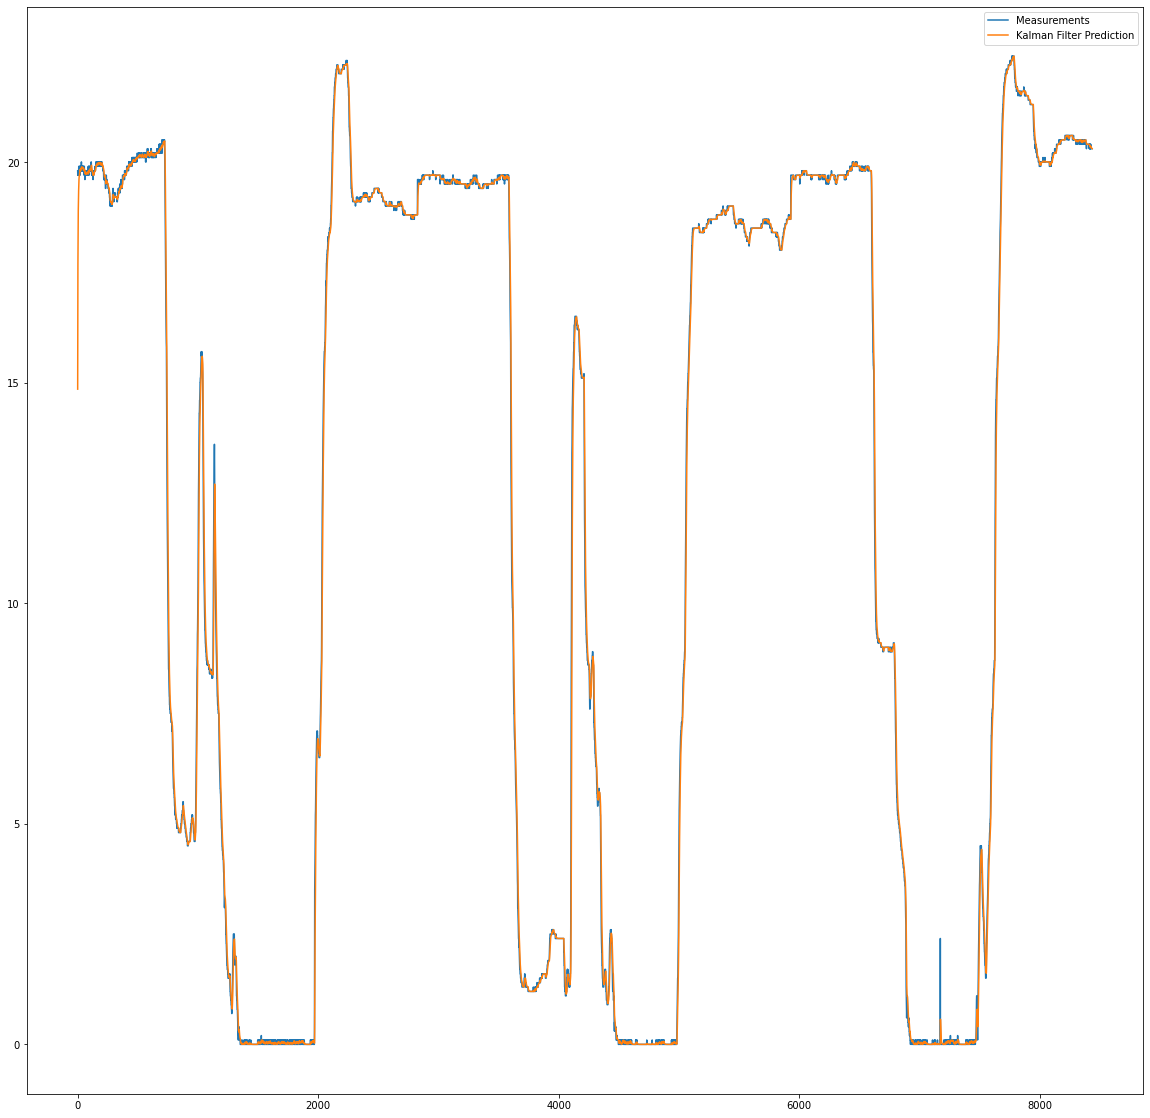

In [37]:
sd = stdev(abel.sog)
# State-transition model
F = np.array([[1]])               
# Observational model - Influences on Kalman Gain
H = np.array([[0.75]])               
# Covariance of the process noise
Q = np.array([[sd]])              
# Covariance of the observation noise
R = np.array([[sd]])              
# Initial value and covariance
x0 = abel.sog.iloc[0]             
P = sd               # Initial covariance

# F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None
#kf_speed = KalmanFilter(F = F, H = H, Q = Q, R = R, P = P, x0 = x0)
kf_speed = KalmanFilter(H = H, R = R, F = F, P = P, x0 = x0)
predictions_speed = predict_kalman(kf_speed, abel.sog)
plot_kalman(abel.sog, predictions_speed)